In [1]:
# from ucimlrepo import fetch_ucirepo


In [26]:
def matrix(cm):
  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix
  import numpy as np
  import itertools

  # Assuming you have your true labels and predicted labels ready
  y_true = [1, 0, 2, 2, 0]
  y_pred = [0, 0, 2, 1, 0]

  # Generate the confusion matrix
  #cm = confusion_matrix(y_test, y_pred_adjusted)

  # Define class labels (adjust according to your specific labels)
  class_labels = ['Class 0', 'Class 1']

  # Create a plot with annotations and appropriate labels
  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_labels))
  plt.xticks(tick_marks, class_labels, rotation=45)
  plt.yticks(tick_marks, class_labels)

  # Annotate each cell with the count
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  # Set axis labels
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")

  # Display the plot
  plt.tight_layout()
  plt.show()

In [2]:
# fetch dataset
# heart_disease = fetch_ucirepo(id=967)



In [3]:
# data (as pandas dataframes)
# X = heart_disease.data.features
# y = heart_disease.data.targets



In [7]:
# import pandas as pd

In [13]:
# X.to_csv('/Users/adityajamwal/My Drive/AI DataScience Related Opportunities/UNC AI Bootcamp/UNC AI Bootcamp Material/16-Project-2/Project 2/X.csv')
# y.to_csv('/Users/adityajamwal/My Drive/AI DataScience Related Opportunities/UNC AI Bootcamp/UNC AI Bootcamp Material/16-Project-2/Project 2/y.csv')

In [1]:
import pandas as pd
X = pd.read_csv('/Users/adityajamwal/My Drive/AI DataScience Related Opportunities/UNC AI Bootcamp/UNC AI Bootcamp Material/16-Project-2/Project 2/X.csv').iloc[:, 1:]
y = pd.read_csv('/Users/adityajamwal/My Drive/AI DataScience Related Opportunities/UNC AI Bootcamp/UNC AI Bootcamp Material/16-Project-2/Project 2/y.csv').iloc[:, 1:]

In [31]:
len(X['TLD'].unique())

695

In [2]:
import pandas as pd
data = X.join(y)
data = data.dropna()
X = data.drop('label', axis=1)
y = data['label']

In [3]:
X = X.select_dtypes(include='number')

In [4]:
y

0         1
1         1
2         1
3         1
4         1
         ..
235790    1
235791    1
235792    1
235793    0
235794    1
Name: label, Length: 235795, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 0.9972518462391007
Testing Data Score: 0.9975741742862474


In [12]:
len(logistic_regression_model.coef_[0])

50

In [8]:
feature_names = X_train.columns
coefficients = logistic_regression_model.coef_[0]
paired_data = zip(feature_names, coefficients)

In [9]:
paired_list = list(paired_data)
print(paired_list)

[('URLLength', -0.6110221588231449), ('DomainLength', 0.07921727256172742), ('IsDomainIP', -0.0005326694783595498), ('URLSimilarityIndex', 0.08632848424797519), ('CharContinuationRate', -0.04677412527939298), ('TLDLegitimateProb', 0.004686594027212374), ('URLCharProb', -0.0017057044145283918), ('TLDLength', -0.13273144500541417), ('NoOfSubDomain', -0.022582477693420578), ('HasObfuscation', -0.0006351286879382942), ('NoOfObfuscatedChar', -0.0026046211752504675), ('ObfuscationRatio', -4.095553899006663e-05), ('NoOfLettersInURL', 0.04826446310345442), ('LetterRatioInURL', -0.00843472586836466), ('NoOfDegitsInURL', -0.2216076559836673), ('DegitRatioInURL', -0.0070164306585751976), ('NoOfEqualsInURL', -0.0027289960939451876), ('NoOfQMarkInURL', -0.0017703484240870367), ('NoOfAmpersandInURL', -0.0008026506544042959), ('NoOfOtherSpecialCharsInURL', -0.16763709340983432), ('SpacialCharRatioInURL', -0.007870679090209961), ('IsHTTPS', 0.10040872465853282), ('LineOfCode', 0.021051058745469836), (

In [10]:
coef = pd.DataFrame(paired_list)
coef['abs']= abs(coef[1])

In [11]:
sorted = coef.sort_values('abs', ascending=False).rename(columns={0:'Feature', 1:'Coef'})[['Feature', 'abs']]

In [13]:
sorted

,Feature,abs
0,URLLength,0.611022
44,NoOfImage,0.455665
46,NoOfJS,0.369190
47,NoOfSelfRef,0.357308
14,NoOfDegitsInURL,0.221608
45,NoOfCSS,0.187148
19,NoOfOtherSpecialCharsInURL,0.167637
7,TLDLength,0.132731
26,URLTitleMatchScore,0.109248
25,DomainTitleMatchScore,0.105451


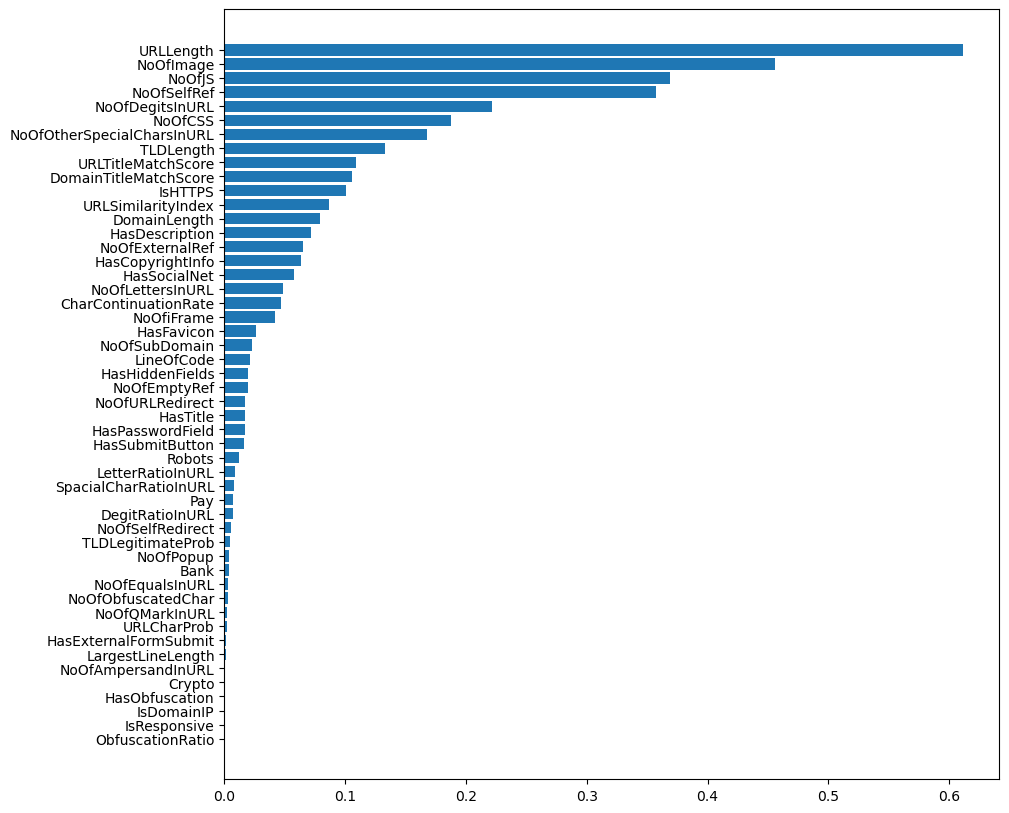

In [12]:
import matplotlib.pyplot as plt
# data = pd.DataFrame([X.columns, logistic_regression_model.coef_[0]]).T
# data['abs'] = abs(data[1].fillna(0))
# data = data.sort_values('abs', ascending=True)
sorteda = sorted.sort_values('abs')
plt.figure(figsize=(10, 10))
plt.barh(sorteda['Feature'], sorteda['abs'])
#plt.xticks(data[0], rotation=90)

pass

In [23]:
from sklearn.linear_model import LogisticRegression

# Train your logistic regression model (code not shown)
model = LogisticRegression()
model.fit(X_train, y_train)

# Default threshold (usually 0.5)
y_pred_default = model.predict(X_test)

# Lower threshold to reduce false negatives
lower_threshold = 0.4
y_pred_adjusted = (model.predict_proba(X_test)[:, 1] > lower_threshold).astype(int)

# Evaluate metrics for both predictions (consider F1-score)
from sklearn.metrics import f1_score
print("F1-score (Default Threshold):", f1_score(y_test, y_pred_default))
print("F1-score (Adjusted Threshold):", f1_score(y_test, y_pred_adjusted))

F1-score (Default Threshold): 0.9978890807906352
F1-score (Adjusted Threshold): 0.9979787846151577


/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
model.predict_proba(X_test)[:,1] > 1

array([False, False, False, ..., False, False, False])

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

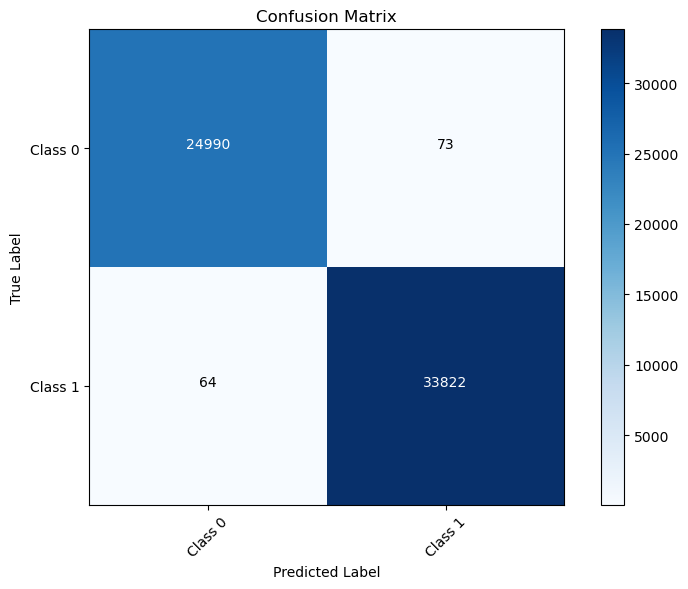

In [28]:
matrix(confusion_matrix(y_test, y_pred_adjusted))

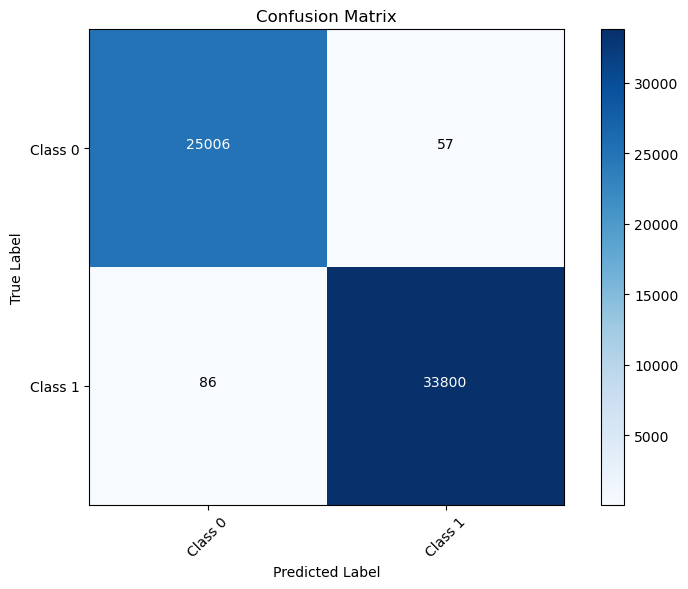

In [32]:
matrix(confusion_matrix(y_test, y_pred_default))

In [33]:
from sklearn.linear_model import LogisticRegression

# Assign higher cost for false negatives (adjust weight as needed)
class_weight = {0: 1, 1: 5}  # Class 0: weight 1, Class 1: weight 5

model = LogisticRegression(class_weight=class_weight)
model.fit(X_train, y_train)

# Make predictions using the fitted model
y_pred = model.predict(X_test)

print("F1-score (Default Threshold):", f1_score(y_test, y_pred))

F1-score (Default Threshold): 0.9975262832405689


/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


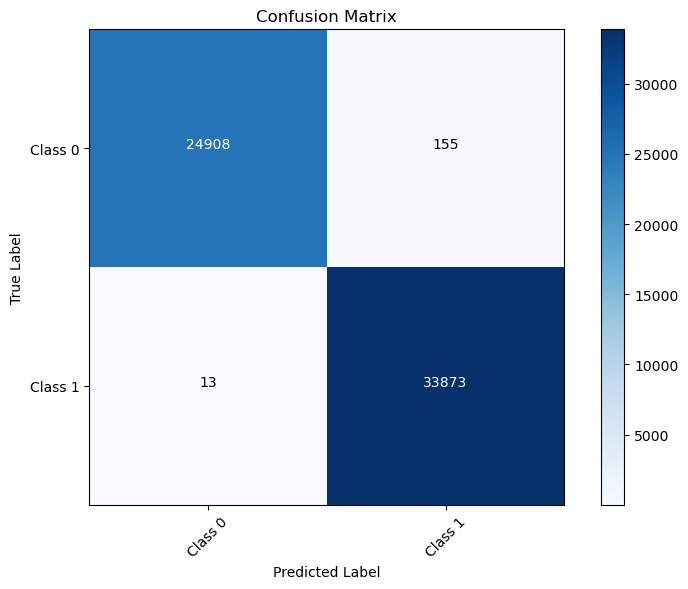

In [34]:
matrix(confusion_matrix(y_test, y_pred))

In [49]:
from sklearn.linear_model import LogisticRegression

# Train your logistic regression model (code not shown)
# Assign higher cost for false negatives (adjust weight as needed)
class_weight = {0: 1, 1: 20}  # Class 0: weight 1, Class 1: weight 5

model = LogisticRegression(class_weight=class_weight)
model.fit(X_train, y_train)

# Make predictions using the fitted model

# Lower threshold to reduce false negatives
lower_threshold = 0.1
y_pred_adjusted = (model.predict_proba(X_test)[:, 1] > lower_threshold).astype(int)

# Evaluate metrics for both predictions (consider F1-score)
from sklearn.metrics import f1_score
print("F1-score (Adjusted Threshold):", f1_score(y_test, y_pred_adjusted))

F1-score (Adjusted Threshold): 0.9902685642479324


/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


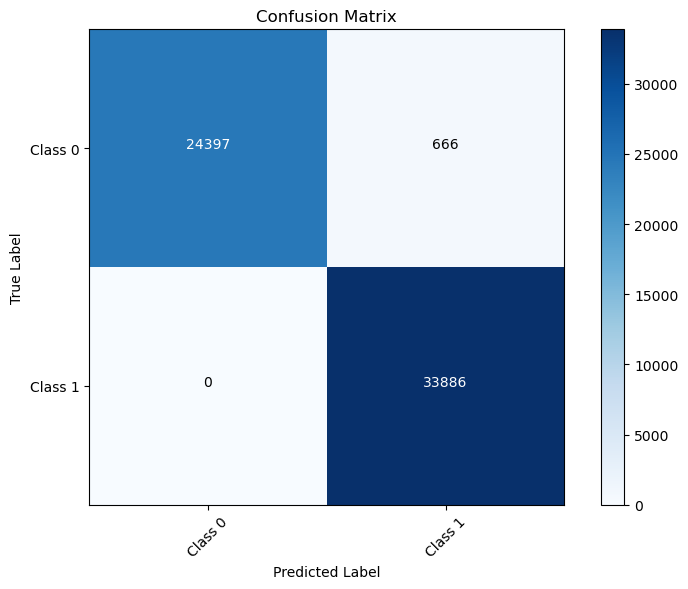

In [50]:
matrix(confusion_matrix(y_test, y_pred_adjusted))

In [51]:
print(classification_report(y_test, y_pred_adjusted, labels = [1, 0]))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     33886
           0       1.00      0.97      0.99     25063

    accuracy                           0.99     58949
   macro avg       0.99      0.99      0.99     58949
weighted avg       0.99      0.99      0.99     58949



In [14]:
new_features = sorted['Feature'].iloc[:5].values

In [15]:
newX = X[new_features]

In [16]:
from sklearn.model_selection import train_test_split
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, y)
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(newX_train, newy_train)

LogisticRegression()

In [17]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(newX_train, newy_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(newX_test, newy_test)}")

Training Data Score: 0.9866324372617984
Testing Data Score: 0.9857673582249062


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score


In [19]:
print(confusion_matrix(newy_test, logistic_regression_model.predict(newX_test), labels = [1,0]))


[[33116   609]
 [  230 24994]]


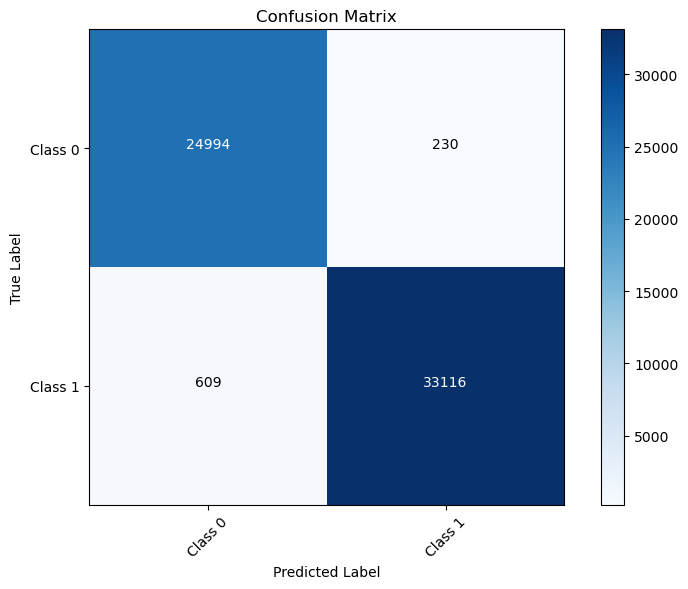

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Assuming you have your true labels and predicted labels ready
y_true = [1, 0, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]

# Generate the confusion matrix
cm = confusion_matrix(newy_test, logistic_regression_model.predict(newX_test))

# Define class labels (adjust according to your specific labels)
class_labels = ['Class 0', 'Class 1']

# Create a plot with annotations and appropriate labels
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Annotate each cell with the count
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Set axis labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
print(classification_report(newy_test, logistic_regression_model.predict(newX_test), labels = [1, 0]))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99     33725
           0       0.98      0.99      0.98     25224

    accuracy                           0.99     58949
   macro avg       0.98      0.99      0.99     58949
weighted avg       0.99      0.99      0.99     58949



In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, y)

cv_scores = cross_val_score(LogisticRegression(), newX_train, newy_train, scoring = "r2")
print('Cross Validation Scores:')
print(f"All scores: {cv_scores}")
print(f"Mean score: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

Cross Validation Scores:
All scores: [0.94263118 0.94782443 0.94343706 0.94563032 0.94909336]
Mean score: 0.94572327182563
Standard Deviation: 0.002472600496550763


In [18]:
print(confusion_matrix(y_test, logistic_regression_model.predict(X_test), labels = [1,0]))


[[33769    83]
 [   85 25012]]


In [19]:
print(classification_report(y_test, logistic_regression_model.predict(X_test), labels = [1, 0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     33852
           0       1.00      1.00      1.00     25097

    accuracy                           1.00     58949
   macro avg       1.00      1.00      1.00     58949
weighted avg       1.00      1.00      1.00     58949



In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

cv_scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring = "r2")
print('Cross Validation Scores:')
print(f"All scores: {cv_scores}")
print(f"Mean score: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")


/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Cross Validation Scores:
All scores: [0.98637767 0.98626193 0.98833996 0.9891479  0.98683894]
Mean score: 0.9873932793130761
Standard Deviation: 0.0011483559293668727


/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.linear_model import Lasso

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for x in alpha_values:
  # Specify the regularization parameter (alpha)
  # alpha = 0.1  # You can tune this value for optimal performance

  # Create the Ridge model with regularization
  lasso_model = Lasso(alpha=x)

  # Train the model on your data
  lasso_model.fit(X_train, y_train)

  # Make predictions on new data
  print(f'\nAlpha: {x}')
  print(f"Training Data Score: {lasso_model.score(X_train, y_train)}")
  print(f"Testing Data Score: {lasso_model.score(X_test, y_test)}")

/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+03, tolerance: 4.331e+00
  model = cd_fast.enet_coordinate_descent(



Alpha: 0.0001
Training Data Score: 0.926277203682268
Testing Data Score: 0.9249075382915749


/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.708e+03, tolerance: 4.331e+00
  model = cd_fast.enet_coordinate_descent(



Alpha: 0.001
Training Data Score: 0.9242140522329135
Testing Data Score: 0.9219651833082507


/Users/adityajamwal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.008e+01, tolerance: 4.331e+00
  model = cd_fast.enet_coordinate_descent(



Alpha: 0.01
Training Data Score: 0.9087314537088216
Testing Data Score: 0.901837670236456

Alpha: 0.1
Training Data Score: 0.7962461952231098
Testing Data Score: 0.7596405704885228

Alpha: 1
Training Data Score: 0.7679464340418165
Testing Data Score: 0.766341759149731

Alpha: 10
Training Data Score: 0.2415110091180135
Testing Data Score: 0.24699099255139656


In [8]:
from sklearn.linear_model import Ridge

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for x in alpha_values:
  # Specify the regularization parameter (alpha)
  # alpha = 0.1  # You can tune this value for optimal performance

  # Create the Ridge model with regularization
  ridge_model = Ridge(alpha=x)

  # Train the model on your data
  ridge_model.fit(X_train, y_train)

  # Make predictions on new data
  print(f'\nAlpha: {x}')
  print(f"Training Data Score: {ridge_model.score(X_train, y_train)}")
  print(f"Testing Data Score: {ridge_model.score(X_test, y_test)}")


Alpha: 0.0001
Training Data Score: 0.927569121771743
Testing Data Score: 0.9270977885417379

Alpha: 0.001
Training Data Score: 0.9275691217331948
Testing Data Score: 0.9270977697175984

Alpha: 0.01
Training Data Score: 0.9275691179656042
Testing Data Score: 0.9270975796341625

Alpha: 0.1
Training Data Score: 0.9275688141491348
Testing Data Score: 0.927095554163506

Alpha: 1
Training Data Score: 0.9275611900535011
Testing Data Score: 0.9270779894544235

Alpha: 10
Training Data Score: 0.9275126326205363
Testing Data Score: 0.9269962438951398
